# Machine Learning
# Assignment 6: PCA

Please write your full name here
- **Name** : "Hasnaa Hossam Hassanein"

## Instructions
- Please place your code where you're asked to. Do not change any other code.
- Submit the notebook with your solutions and keep the cell outputs.
- Please name your notebook in the following format "assignment6_FirstnameLastname.ipynb"
- Late submissions will be penalized.

# PCA

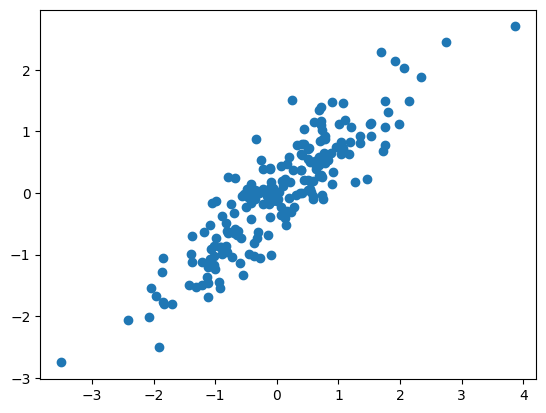

In [139]:
import numpy as np
import matplotlib.pyplot as plt

## Data
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [140]:
#### YOUR FUNCTION
def pca(X):
    # Center the data
    mean = np.mean(X, axis=0)
    X_centered = X - mean

    # calculate Covariance Matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # calculate eigen values and vectors
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

    # sort eigen values and vectors
    sorted_indecies = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_indecies]
    sorted_eigenvectors = eigen_vectors[:, sorted_indecies]

    # Transform the data
    X_reduced = X_centered @ sorted_eigenvectors

    return sorted_eigenvectors, sorted_eigenvalue, X_reduced

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA eigenvectors over the ORIGINAL data with the correct directions!

In [141]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalue, X_transformed = pca(X)

In [142]:
print("Eigenvalues are: ", sorted_eigenvalue)

Eigenvalues are:  [1.82927343 0.10246373]


Text(0, 0.5, 'PC2')

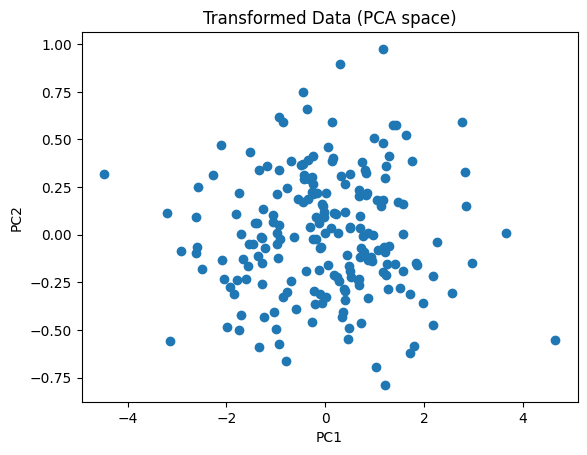

In [143]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.title("Transformed Data (PCA space)")
plt.xlabel("PC1")
plt.ylabel("PC2")

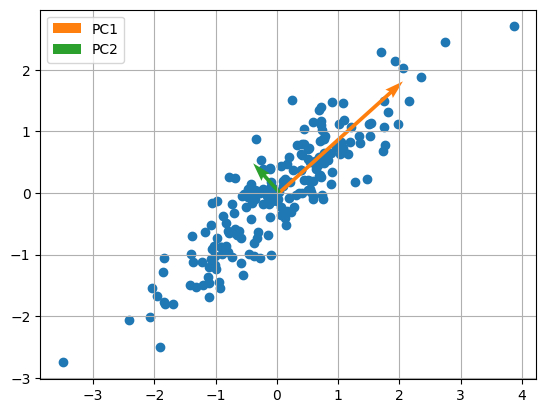

In [144]:
plt.scatter(X[:, 0], X[:, 1])
mean = np.mean(X, axis=0)

for i in range(len(sorted_eigenvalue)):
    vector = sorted_eigenvectors[:, i] * 2 * np.sqrt(sorted_eigenvalue[i])
    plt.quiver(*mean, vector[0], vector[1], color=f'C{i+1}', scale_units='xy', scale=1, label=f"PC{i+1}")

plt.grid(True)
plt.legend()
plt.show()

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [145]:
from sklearn.decomposition import PCA

pca = PCA()
X_transformed_sklearn = pca.fit_transform(X)

print("Sklearn Eigen Vlaues: ", pca.explained_variance_)

Sklearn Eigen Vlaues:  [1.82927343 0.10246373]
